# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsabilla Athifah Yonara
- **Email:** m284b4kx4045@bangkit.academy
- **ID Dicoding:** salsabilla_athifah_yonara_m284b4kx4045_Wc2S

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda (baik oleh pengguna kasual maupun terdaftar)?
- Bagaimana tren peminjaman sepeda  berdasarkan jam dalam sehari, dan apakah ada perbedaan antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### **Menilai Tabel** `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
day_duplicates = day_df.duplicated().sum()
print(f"Jumlah duplikat pada dataset harian: {day_duplicates}")

Jumlah duplikat pada dataset harian: 0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Menilai Tabel `hour_df`**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
hour_duplicates = hour_df.duplicated().sum()
print(f"Jumlah duplikat pada dataset jam: {hour_duplicates}")

Jumlah duplikat pada dataset jam: 0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### **Membersihkan tabel** `day_df`

In [12]:
if day_duplicates > 0:
    day_df.drop_duplicates(inplace=True)

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### **Membersihkan tabel** `hour_df`

In [14]:
if hour_duplicates > 0:
    hour_df.drop_duplicates(inplace=True)

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### **Explore** `day_df`




In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
229,230,2011-08-18,3,0,8,0,4,1,1,0.711667,0.662258,0.654583,0.233208,639,3166,3805
231,232,2011-08-20,3,0,8,0,6,0,1,0.697500,0.648996,0.674167,0.104467,1914,3277,5191
142,143,2011-05-23,2,0,5,0,1,1,2,0.631667,0.590296,0.810000,0.233842,836,3438,4274


In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
day_duplicates = day_df.instant.duplicated().sum()
print(f"Jumlah duplikat pada kolom 'instant' di dataset harian: {day_duplicates}")

Jumlah duplikat pada kolom 'instant' di dataset harian: 0


### **Explore** `hour_df`

In [20]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10472,10473,2012-03-17,1,1,3,11,0,6,0,2,0.52,0.5000,0.77,0.1343,226,359,585
12731,12732,2012-06-19,2,1,6,16,0,2,1,1,0.80,0.7576,0.55,0.2239,48,286,334
6946,6947,2011-10-22,4,0,10,1,0,6,0,1,0.40,0.4091,0.62,0.1940,20,50,70
5645,5646,2011-08-28,3,0,8,16,0,0,0,1,0.80,0.7121,0.36,0.3881,196,295,491
6157,6158,2011-09-19,3,0,9,3,0,1,1,2,0.50,0.4848,0.77,0.1343,1,4,5


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
hour_duplicates = hour_df.instant.duplicated().sum()
print(f"Jumlah duplikat pada kolom 'instant' di dataset jam: {day_duplicates}")

Jumlah duplikat pada kolom 'instant' di dataset jam: 0




>  Mengelompokkan Berdasarkan Musim dan Menghitung Statistik untuk Peminjaman Sepeda





In [23]:
season_stats = day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})
print(season_stats)

         cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261


## Visualization & Explanatory Analysis


### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda (baik oleh pengguna kasual maupun terdaftar)?

In [24]:
# Mengelompokkan data berdasarkan cuaca untuk menghitung total peminjaman
weather_data = day_df.groupby('weathersit').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Mengatur label kondisi cuaca
weather_data['weathersit'] = weather_data['weathersit'].map({
    1: 'Cerah',
    2: 'Kabut',
    3: 'Hujan Ringan/Salju',
    4: 'Hujan Lebat'
})

weather_data

,weathersit,cnt,casual,registered
0,Cerah,2257952,446346,1811606
1,Kabut,996858,169776,827082
2,Hujan Ringan/Salju,37869,3895,33974


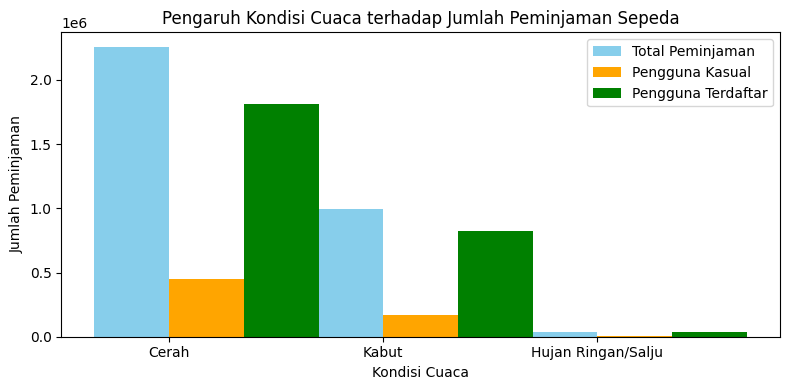

In [25]:
# Visualisasi menggunakan bar plot dengan ukuran lebih kecil
plt.figure(figsize=(8, 4))  # Mengubah ukuran gambar menjadi lebih kecil
bar_width = 0.35
x = np.arange(len(weather_data['weathersit']))

# Menambahkan total peminjaman, kasual, dan terdaftar ke plot
plt.bar(x - bar_width/2, weather_data['cnt'], width=bar_width, label='Total Peminjaman', color='skyblue')
plt.bar(x + bar_width/2, weather_data['casual'], width=bar_width, label='Pengguna Kasual', color='orange')
plt.bar(x + 1.5*bar_width, weather_data['registered'], width=bar_width, label='Pengguna Terdaftar', color='green')

# Mengatur label dan judul
plt.xticks(x, weather_data['weathersit'])
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.tight_layout()  # Mengatur layout agar lebih rapi
plt.show()


### Pertanyaan 2: Bagaimana tren peminjaman sepeda  berdasarkan jam dalam sehari, dan apakah ada perbedaan antara hari kerja dan akhir pekan?

<ipython-input-26-b081aab8c7a8>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


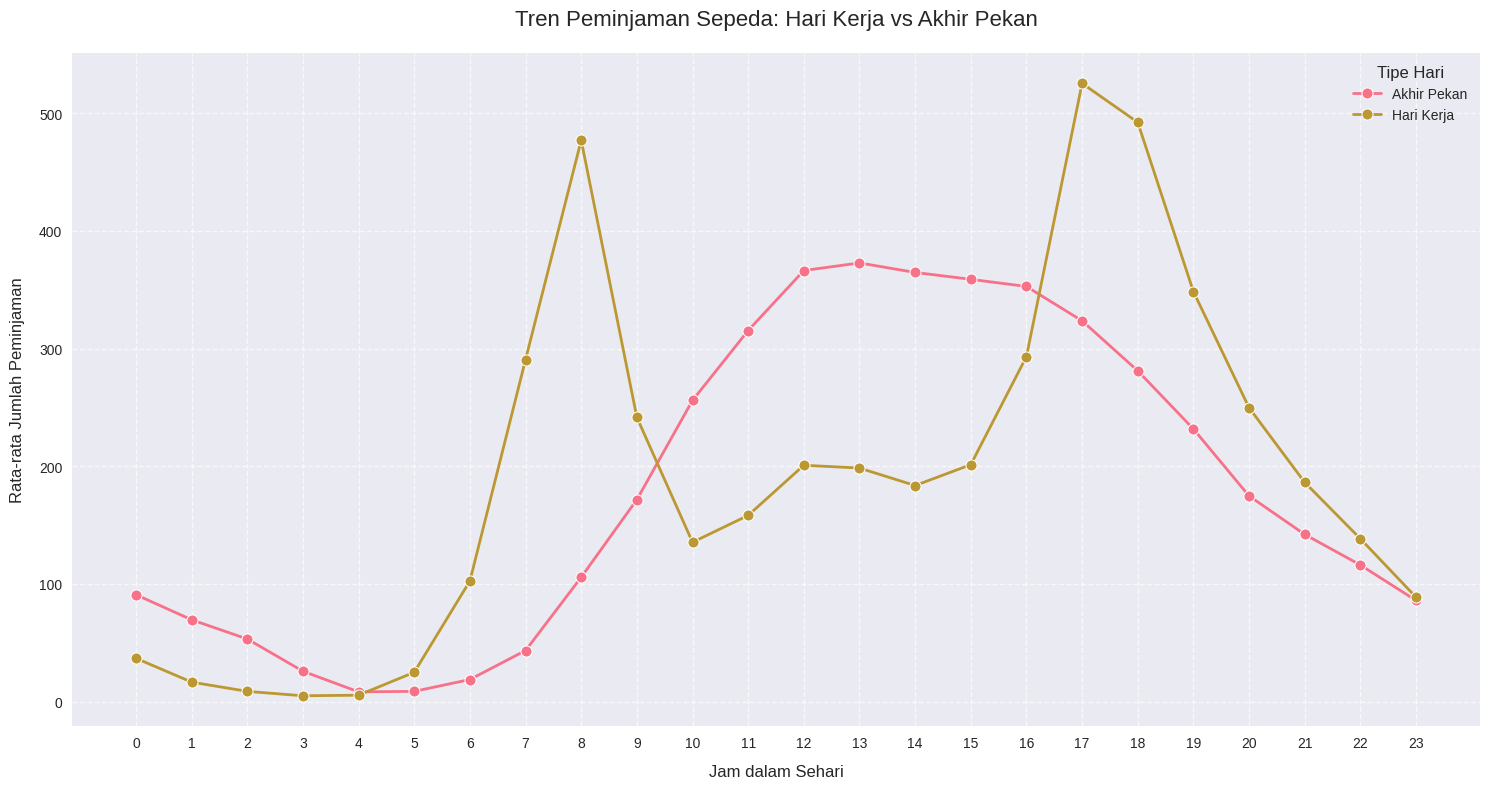


Sampel data yang digunakan dalam plot:
   hr   workingday        cnt
0   0  Akhir Pekan  90.800000
1   0   Hari Kerja  36.786290
2   1  Akhir Pekan  69.508696
3   1   Hari Kerja  16.552632
4   2  Akhir Pekan  53.171053

Nilai unik dalam kolom workingday:
['Akhir Pekan' 'Hari Kerja']


In [26]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style untuk visualisasi yang lebih baik
plt.style.use('seaborn')
sns.set_palette("husl")

# Asumsikan hour_df sudah ada
# Sebelum membuat plot, kita perlu memastikan data workingday sudah benar
# Mengubah nilai workingday menjadi kategorikal yang lebih deskriptif
hour_df['workingday'] = hour_df['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Mengelompokkan data berdasarkan jam dan hari kerja
hour_avg = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=hour_avg,
    x='hr',
    y='cnt',
    hue='workingday',
    marker='o',
    markersize=8,
    linewidth=2
)

# Memperbaiki tampilan plot
plt.title('Tren Peminjaman Sepeda: Hari Kerja vs Akhir Pekan', fontsize=16, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12, labelpad=10)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=12, labelpad=10)

# Mengatur ticks pada sumbu x
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)

# Memperbaiki legend
plt.legend(
    title='Tipe Hari',
    fontsize=10,
    title_fontsize=12
)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(True, linestyle='--', alpha=0.7)

# Mengatur layout agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

# Untuk memverifikasi data, mari tampilkan beberapa baris dari hour_avg
print("\nSampel data yang digunakan dalam plot:")
print(hour_avg.head())

# Menampilkan nilai unik dalam kolom workingday
print("\nNilai unik dalam kolom workingday:")
print(hour_avg['workingday'].unique())

## Conclusion

- Conclution pertanyaan 1
1. Cuaca cerah meningkatkan jumlah peminjaman sepeda secara signifikan untuk pengguna kasual dan terdaftar.
2. Cuaca buruk seperti hujan lebat atau salju mengurangi peminjaman secara drastis, terutama untuk pengguna kasual.
3. Pengguna terdaftar cenderung tetap meminjam sepeda dalam kondisi cuaca yang lebih beragam, sedangkan pengguna kasual lebih memilih meminjam saat cuaca baik.



*   Conclution pertanyaan 2
1. Hari Kerja: Peminjaman mencapai puncak pada pagi (7-9) dan sore (17-19), menunjukkan penggunaan sepeda untuk keperluan komuter.
2. Akhir Pekan: Peminjaman meningkat secara bertahap sepanjang hari dan mencapai puncak di siang hingga sore, menunjukkan penggunaan untuk rekreasi.

Kesimpulan: Penggunaan sepeda pada hari kerja cenderung terkait dengan aktivitas komuter, sementara pada akhir pekan lebih untuk rekreasi.